In [ ]:
import pandas as pd

In [ ]:
fp = "semic\\materials\\material_properties.csv"
datacol = ['Si',
 'Ge',
 'C',
 'SiC(3C)',
 'SiC(4H)',
 'SiC(6H)',
 'w-BN',
 'c-BN',
 'h-BN',
 'AlN']
data=pd.read_csv(fp)
data

In [ ]:
dft = data.transpose()
dft

In [ ]:
class Semiconductor:
    def __init__(self,temp=300):
        self.temperature = temp

class Si(Semiconductor):
    def infrared_refractive_index(self,
                                  temp: float=None)-> float:
        """
        Calculates the refractive index based on temperature. This equation only works
        on temperature ranges between 77K and 400K.

        Parameters
        ----------
        temp : float, optional
            temperature in Kelvin, by default None

        Returns
        -------
        float
            The refractive index

        Raises
        ------
        ValueError
            Temperature is outside of range specified
        """
        temp = self.abstemp if temp is None else temp

        if 77 < temp < 400:
            return 3.38 * (1 + (3.9e-5 * temp))
        else:
            raise ValueError("Temperature outside of specified range (77 < temp < 400)!")

In [ ]:
dev = Si()

In [ ]:
y = [dev.infrared_refractive_index(i) for i in range(78,399,1)]
x = [i for i in range(78,399,1)]

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Line(x=x,y=y,mode="markers"))
fig.show()

In [ ]:
from semic.materials.si import Si

In [ ]:
dev = Si()

In [ ]:
eg = [dev.bandgap_pressure_dependence(i) for i in range(800,int(1e3),int(0.5e1))]
pressure = [i for i in range(800,int(1e3),int(0.5e1))]

In [ ]:
fig = go.Figure(go.Scatter(x=pressure,y=eg,mode="lines"))
fig.show()

In [ ]:
import operator

In [ ]:

class dummy:
    def __init__(self,
                 density):
        self.density = density
    
    density = property(operator.attrgetter('_density'))

    @property
    def density(self):
        return self._density
    
    @density.setter
    def density(self,value):
        if type(value) != int and type(value) != float:
            raise Exception("density must be int or float types!")
        elif value <= 0:
            raise Exception("density must be non-zero and positive!")
        self._density = value

In [ ]:
dev = dummy(density = float(3.25))

In [ ]:
from semic.materials.si import Si

In [ ]:
import plotly.graph_objects as go
dev = Si()

In [ ]:
x = [i for i in range(0,301)]
eg = [dev.bandgap_temp_dependence(i) for i in range(0,301)]

In [ ]:
def bandgap(temp):
    return 1.16 - ((0.000702*temp**2) / (temp+1108))

eg1 = [bandgap(i) for i in range(0,301)]

In [ ]:

fig = go.Figure(data=go.Scatter(x=x,y=eg,mode="lines"))
fig.add_trace(go.Scatter(x=x,y=eg1,mode="lines"))
fig.show()

In [ ]:
from semic.bjt.bjt import BJT

In [ ]:
dev = BJT(isc=1e-16,ise=1e-16,iss=1e-16,rc=10e-3,tf=2e-6,vaf=10.0)

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [ ]:
y = [dev.collector_current(vbc=0.7,vbe=i) for i in np.arange(0.7,1.5,0.001)]
x = [i for i in np.arange(-50,1.5,1)]
y1 = [dev.base_current(vbc=0.7+i,vbe=i) for i in np.arange(-50,1.5,1)]

In [ ]:
fig = go.Figure(data=go.Scatter(x=x,y=y1,mode="lines"))
#fig.add_trace(go.Scatter(x=x,y=y1))
fig.show()

In [1]:
from semic.math.coordinate import Spherical,Rectangular3D
import numpy as np

In [2]:
point = Spherical(12.84523257866513,0.6785256342915735,1.0516502125483738)
origin = Rectangular3D(0,0,0)
point2 = Rectangular3D(4,7,10)

In [4]:
origin.to_spherical(point2,True)

(12.84523257866513, 38.876655136344326, 60.25511870305778)

In [1]:
from semic.interfaces.schottky import SchottkyBarrier

dut = SchottkyBarrier(0)

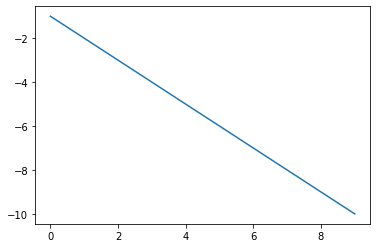

In [2]:
dut.model()